Given an input image, a GIST descriptor is computed by
1.  Convolve the image with 32 Gabor filters at 4 scales, 8 orientations, producing 32 feature maps of the same size of the input image.
2.  Divide each feature map into 16 regions (by a 4x4 grid), and then average the feature values within each region.
3.  Concatenate the 16 averaged values of all 32 feature maps, resulting in a 16x32=512 GIST descriptor.
Intuitively, GIST summarizes the gradient information (scales and orientations) for different parts of an image, which provides a rough description (the gist) of the scene.

Reference:
1.  Modeling the shape of the scene: a holistic representation of the spatial envelope

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import gabor_kernel
from scipy import ndimage as ndi

from tqdm import tqdm

dataset = "./dataset/"
dataset_sample = "./dataset/sample/"

In [2]:
def make_square_img(img):
    
    H, W, _ = img.shape
    
    side_length = (int(min(H,W)/4)) * 4
    half_side_length = side_length // 2
    
    top = H//2 - half_side_length
    bottom = side_length + H//2 - half_side_length
    
    left = W//2 - half_side_length
    right = side_length + W//2 - half_side_length
    
    new_img = img[top:bottom, left:right, :]
    
    return np.array(new_img)

In [3]:
def match(feats, ref_feats):
    min_error = np.inf
    min_i = None
    for i in range(ref_feats.shape[0]):
        error = np.sum((feats - ref_feats[i, :])**2)
        if error < min_error and error != 0:
            min_error = error
            min_i = i
            
    print(min_error)
    return min_i

In [4]:
def compute_gist_descriptor(img, kernels):
    
    img_squared = make_square_img(img)
    img_squared = img_squared.astype('float32')
    img_grayscale = cv2.cvtColor(img_squared, cv2.COLOR_RGB2GRAY)
         
    shrink = (slice(0, None, 3), slice(0, None, 3))
    
    feats = np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = ndi.convolve(img_grayscale, kernel, mode='wrap')
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
    
    return feats

In [5]:
# prepare filter bank kernels
kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta, sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)

In [9]:
final_dataset_dir = dataset + "bridge"

In [ ]:
descriptors = []
file_paths = []

total_files = 0
for path, subdirs, files in os.walk(final_dataset_dir):
    for name in files:
        total_files += 1
        
count = 0
for path, subdirs, files in os.walk(final_dataset_dir):
    for name in files:
        
        count += 1
        if (count % 10 == 1):
            print("Progress: {}/{}".format(count, total_files))
        
        file_path = os.path.join(path, name)
        file_paths.append(file_path)
        
        img = cv2.cvtColor(cv2.imread(file_path), cv2.COLOR_BGR2RGB) / 255.0
        
        descriptors.append(compute_gist_descriptor(img, kernels))

Progress: 1/1000
Progress: 11/1000
Progress: 21/1000
Progress: 31/1000
Progress: 41/1000
Progress: 51/1000
Progress: 61/1000
Progress: 71/1000
Progress: 81/1000
Progress: 91/1000
Progress: 101/1000
Progress: 111/1000
Progress: 121/1000
Progress: 131/1000
Progress: 141/1000
Progress: 151/1000
Progress: 161/1000
Progress: 171/1000
Progress: 181/1000
Progress: 191/1000
Progress: 201/1000
Progress: 211/1000
Progress: 221/1000
Progress: 231/1000
Progress: 241/1000
Progress: 251/1000
Progress: 261/1000
Progress: 271/1000
Progress: 281/1000
Progress: 291/1000
Progress: 301/1000
Progress: 311/1000
Progress: 321/1000
Progress: 331/1000
Progress: 341/1000
Progress: 351/1000
Progress: 361/1000
Progress: 371/1000
Progress: 381/1000
Progress: 391/1000
Progress: 401/1000
Progress: 411/1000
Progress: 421/1000
Progress: 431/1000
Progress: 441/1000
Progress: 451/1000
Progress: 461/1000
Progress: 471/1000
Progress: 481/1000
Progress: 491/1000
Progress: 501/1000
Progress: 511/1000
Progress: 521/1000
Prog

In [ ]:
input_image = cv2.cvtColor(cv2.imread(final_dataset_dir + "0054.jpg"), cv2.COLOR_BGR2RGB) / 255.0

plt.figure()
plt.imshow(input_image)

In [42]:
feature = compute_gist_descriptor(input_image, kernels)

In [43]:
descriptors = np.array(descriptors)

In [44]:
index = match(feature, descriptors)

0.00014088373250531724


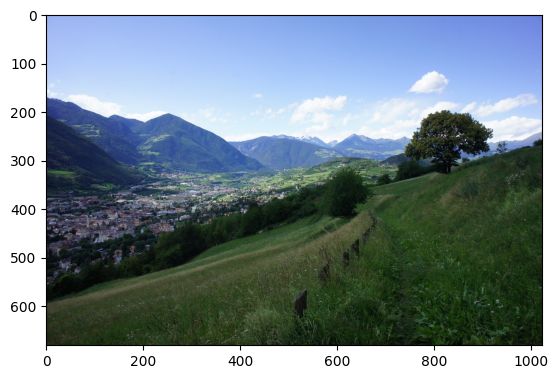

In [45]:
match_image = cv2.cvtColor(cv2.imread(file_paths[index]), cv2.COLOR_BGR2RGB) / 255.0

plt.figure()
plt.imshow(match_image)